EXP NO: 03
DATE:
Build machine learning model/s to predict the actual price of the new mobile based on
other given features like RAM, Internal Memory etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv(r'/content/train.csv')
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [3]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.shape

(2000, 21)

In [6]:
# Separate features and target
X = data.drop('price_range', axis=1) # 'Price' is used as 'price_range'
y = data['price_range']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Defining preprocessing steps
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='mean')),
('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
transformers=[
('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)
])
# Building the model pipeline
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', RandomForestRegressor(random_state=42))
])
# Train the model
model.fit(X_train, y_train)
# Predict on test data
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.07
R-squared: 0.95


In [7]:
#Define the pipeline with the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

log_reg_model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])
# Fit the Linear Regression model
log_reg_model.fit(X_train, y_train)
# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
# Evaluate the model
mae_log_reg = mean_absolute_error(y_test, y_pred_log_reg)
mse_log_reg = mean_squared_error(y_test, y_pred_log_reg)
r2_log_reg = r2_score(y_test, y_pred_log_reg)
# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_log_reg:.2f}')
print(f'Mean Squared Error (MSE): {mse_log_reg:.2f}')
print(f'R-squared (R2): {r2_log_reg:.2f}')

Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.10
R-squared (R2): 0.92


In [8]:
#Define the pipeline with the Linear Regression model
log_reg_model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])
# Fit the Linear Regression model
log_reg_model.fit(X_train, y_train)
# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
# Evaluate the model
mae_log_reg = mean_absolute_error(y_test, y_pred_log_reg)
mse_log_reg = mean_squared_error(y_test, y_pred_log_reg)
r2_log_reg = r2_score(y_test, y_pred_log_reg)
# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae_log_reg:.2f}')
print(f'Mean Squared Error (MSE): {mse_log_reg:.2f}')
print(f'R-squared (R2): {r2_log_reg:.2f}')


Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.10
R-squared (R2): 0.92


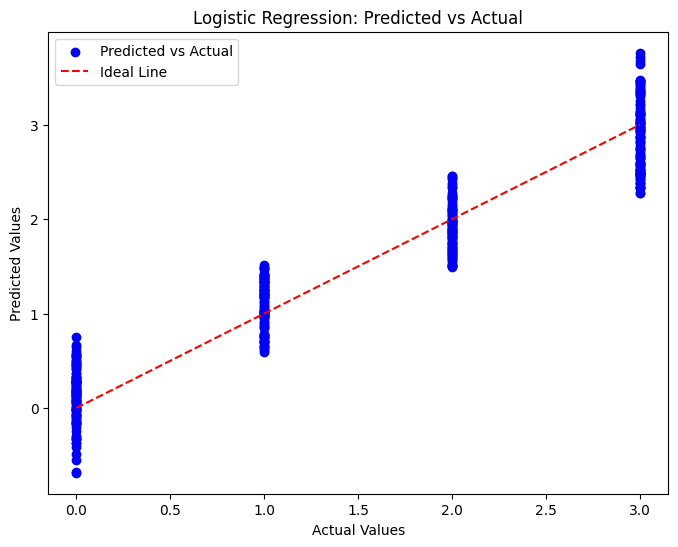

In [9]:
# Assuming 'y_test' and 'y_pred_log_reg' are already defined
# Plotting the predicted vs actual values for Logistic Regression
plt.figure(figsize=(8, 6))
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred_log_reg, color='blue', label='Predicted vs Actual')
# Plotting the ideal line where predicted = actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--',
label='Ideal Line')
# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Logistic Regression: Predicted vs Actual')
# Show the legend
plt.legend()
# Display the plot
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
# Sample dataset (replace this with your actual dataset)
data = {
# "Brand": [ # Removed Brand as it is not used in features
# "Karbonn K24 Plus Pro",
# "InFocus POWER 2",
# "Alcatel 5V (Spectrum Blue, 32 )",
# "JIVI JV 12M",
# "Blacear B5 Grip"
# ],
"Ratings": [3.8, 4.1, 4.4, 3.7, 3.5],
"RAM": [6.0, 8.0, 3.0, 10.0, 6.0],
"ROM": [32.0, 64.0, 32.0, 32.0, 32.0],
"Mobile_Size": [4.54, 4.54, 6.20, 4.50, 4.50],
"Primary_Cam": [48, 64, 48, 64, 64],
"Selfi_Cam": [12.0, np.nan, 1.0, np.nan, 15.0],
"Battery_Power": [2800, 2500, 3800, 3500, 1050],
"Price": [1299, 1390, 9790, 799, 799]
}
# Convert data to a DataFrame
df = pd.DataFrame(data)
# Features and target
# df.drop(columns=["Brand"], inplace=True) # Exclude the Brand column
X = df.drop(columns=["Price"])
y = df["Price"]
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict prices based on test features
y_pred = model.predict(X_test)
# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Function to predict price based on customer needs
def predict_price(features):
    features = np.array(features).reshape(1, -1) # Ensure the input is 2D
    features = pd.DataFrame(features, columns=X.columns) # Convert to DataFrame with column names
    features = imputer.transform(features) # Impute missing values
    predicted_price = model.predict(features)
    return predicted_price[0]
# Example usage:
# Example features provided by a customer
customer_features = [4.0, 8.0, 64.0, 5.5, 64, 8.0, 3000]
predicted_price = predict_price(customer_features)
print("Predicted Price:", predicted_price)

Mean Squared Error: 1654207.445263616
Predicted Price: 3258.0935495599733


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
# Sample dataset (replace this with your actual dataset)
data = {
"Brand": [
"Karbonn K24 Plus Pro",
"InFocus POWER 2",
"Alcatel 5V (Spectrum Blue, 32 )",
"JIVI JV 12M",
"Blacear B5 Grip"
],
"Ratings": [3.8, 4.1, 4.4, 3.7, 3.5],
"RAM": [6.0, 8.0, 3.0, 10.0, 6.0],
"ROM": [32.0, 64.0, 32.0, 32.0, 32.0],
"Mobile_Size": [4.54, 4.54, 6.20, 4.50, 4.50],
"Primary_Cam": [48, 64, 48, 64, 64],
"Selfi_Cam": [12.0, np.nan, 1.0, np.nan, 15.0],
"Battery_Power": [2800, 2500, 3800, 3500, 1050],
"Price": [1299, 1390, 9790, 799, 799]
}
# Convert data to a DataFrame
df = pd.DataFrame(data)
# Features and target
df.drop(columns=["Brand"], inplace=True) # Exclude the Brand column
X = df.drop(columns=["Price"])
y = df["Price"]
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict prices based on test features
y_pred = model.predict(X_test)
# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Function to predict price based on customer needs
def predict_price(features):
    if len(features) != len(X.columns):
        raise ValueError(f"Expected {len(X.columns)} features, but got {len(features)}")
    features = np.array(features).reshape(1, -1) # Ensure the input is 2D
    features = imputer.transform(features) # Impute missing values
    predicted_price = model.predict(features)
    return predicted_price[0]
# Example usage:
# Example features provided by a customer
customer_features = [4.0, 8.0, 64.0, 5.5, 64, 8.0, 3000] # Removed one value to match the 7 features
try:
    predicted_price = predict_price(customer_features)
    print("Predicted Price:", predicted_price)
except ValueError as e:
    print("Error:", e)

Mean Squared Error: 1654207.445263616
Predicted Price: 3258.0935495599733


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
